In [3]:
from IPython.display import HTML

In [13]:
import numpy as np
a = [1, 2, 3]
b = (1, 2, 3)
c = np.array([2, 3, 4])
c.reshape([1, -1]).shape

(1, 3)

In [21]:
np.clip([2, 5, 3, 24, 5, 23], 5, 10)

array([ 5,  5,  5, 10,  5, 10])

In [2]:
from lagom.core.policies import 

In [1]:
import gym

from gym_maze.envs import SparseMazeEnv
from gym_maze.envs import RandomBlockMazeGenerator

import numpy as np

import argparse

import os

import torch
import torch.optim as optim

from lagom.agents import REINFORCEAgent
from lagom.core.policies import CategoricalMLPGoalPolicy
from lagom.runner import Runner
from lagom.envs import EnvSpec

maze = RandomBlockMazeGenerator(maze_size=4, obstacle_ratio=0.0)
env = SparseMazeEnv(maze, action_type='VonNeumann', render_trace=False)
env.init_state = [1, 1]
env.goal_states = [[2, 2]]  #[[6, 6]]

env_spec = EnvSpec(env)
env_spec.get('goal_dim')
env_spec.set('test', 3)

In [13]:
import argparse

parser = argparse.ArgumentParser(description='REINFORCE')
parser.add_argument('--lr', type=float, default=1e-2, 
                    help='learning rate (default: 1e-2)')
parser.add_argument('--gamma', type=float, default=0.99, 
                    help='discount factor (default: 0.99)')
parser.add_argument('--seed', type=int, default=543, 
                    help='random seed (default: 543)')
parser.add_argument('--render', action='store_true', 
                    help='render the environment')
parser.add_argument('--log-interval', type=int, default=1,
                    help='interval between training status logs (default: 1)')
args = parser.parse_args([])
args.beta = 5


In [4]:
!python run_maze_goalpolicy.py --seed 543 --lr 1e-2 --log-interval 1

------------------------------------------------- 
Iteration # 1
	Loss                          -0.042105
	Num Episodes                  1000
	Average Return                0.614000
	Std Return                    0.486831
	Min Return                    0.000000
	Max Return                    1.000000
------------------------------------------------- 
Iteration # 2
	Loss                          -0.484314
	Num Episodes                  1000
	Average Return                0.833000
	Std Return                    0.372976
	Min Return                    0.000000
	Max Return                    1.000000
------------------------------------------------- 
Iteration # 3
	Loss                          -0.862201
	Num Episodes                  1000
	Average Return                0.922000
	Std Return                    0.268172
	Min Return                    0.000000
	Max Return                    1.000000
------------------------------------------------- 
Iteration # 4
	Loss                        

# Create file of running scripts

In [6]:
import numpy as np
import os
from itertools import product

import shutil

list_seeds = np.random.randint(low=0, high=99999, size=10)
list_lrs = 10**np.random.uniform(low=-6, high=1, size=10)  # numerical stability, see http://cs231n.github.io/neural-networks-3/#hyper

# Clean up the old log directory if existed
log_path = 'logs/'
if os.path.exists(log_path):
    shutil.rmtree(log_path)
os.makedirs(log_path)

# Clean up the old script.txt file if existed
script_path = os.path.join(log_path, 'script.txt')
if os.path.exists(script_path):
    os.remove(script_path)

for seed, lr in product(list_seeds, list_lrs):
    script_str = '\'python run_emptymaze.py --seed {:d} --lr {:f}\''
    
    script_str = script_str.format(seed, lr)
    
    with open(script_path, 'a') as f:
        f.write(script_str)
        f.write('\n\n')
    
#cat logs/script.txt | xargs -n 1 -P 4 bash -c

# Visualization of learning dynamics
### Average over different random seeds

/home/zuo/anaconda3/envs/RL/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


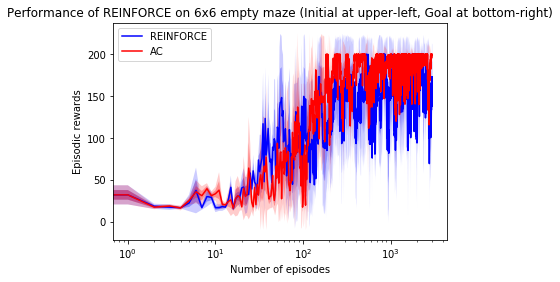

In [102]:
import numpy as np
from plotter import Plotter

from glob import glob  # matching pathnames with patterns

plotter = Plotter()

scales = [0.5, 1.0]
alphas = [0.3, 0.2]

data = []
for filepath in glob('logs/REINFORCE/*.npy'):
    data.append(np.load(filepath))
plotter.add_curve(data, 
                  color='blue', 
                  label='REINFORCE', 
                  uncertainty=True, 
                  scales=scales, 
                  alphas=alphas)

data = []
for filepath in glob('logs/ActorCritic/*.npy'):
    data.append(np.load(filepath))
plotter.add_curve(data, 
                  color='red', 
                  label='AC', 
                  uncertainty=True, 
                  scales=scales, 
                  alphas=alphas)

title = 'Performance of REINFORCE on 6x6 empty maze (Initial at upper-left, Goal at bottom-right)'
xlabel = 'Number of episodes'
ylabel = 'Episodic rewards'
fig = plotter.plot(title, xlabel, ylabel, log_x=True)
fig.show()

fig.savefig('logs/tmp.png')